# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

## Data pre-processing

### Handle nulls

In [2]:
# Check for nulls
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [3]:
# Print rows with nulls for DepDelay and DepDel15
df_flights[df_flights.isnull().any(axis=1)][["DepDelay","DepDel15"]]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [4]:
# Get the unique values of DepDelay for the rows where DepDel15 is null
df_flights[df_flights["DepDel15"].isnull()]["DepDelay"].unique()

array([0])

DepDelay is always 0 when DepDel15 is null, hence, we can fill the nulls with 0, i.e., the flight did not have an delayed departure

In [5]:
df_flights["DepDel15"] = df_flights["DepDel15"].fillna(0)

In [6]:
# Check for nulls
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### Handle outliers

In [7]:
def show_distribution(var_data):
    """Function to show summary stats and distribution for a column"""

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(
        var_data.name, 
        f"\nMinimum:{min_val:.2f}\nMean:{mean_val:.2f}\nMedian:{med_val:.2f}\nMode:{mod_val:.2f}\nMaximum:{max_val:.2f}\n"
    )

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel("Frequency")

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = "gray", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=mean_val, color = "cyan", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=med_val, color = "red", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=mod_val, color = "yellow", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=max_val, color = "gray", linestyle="dashed", linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel("Value")

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



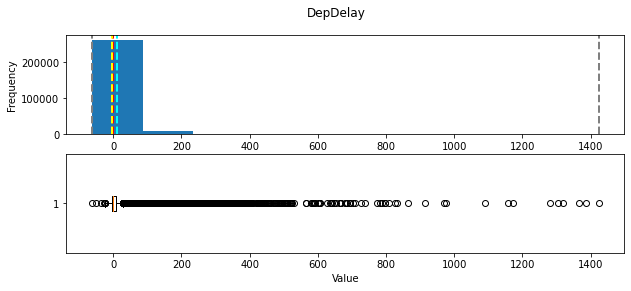

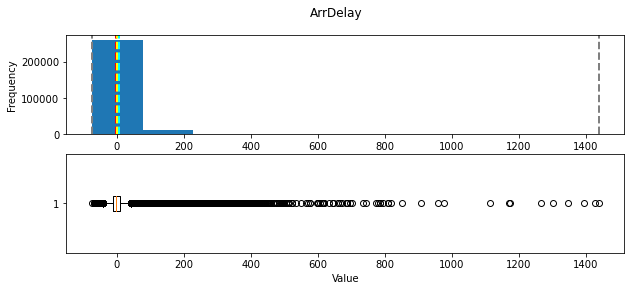

In [8]:
# Call the function for each delay field
delayFields = ["DepDelay","ArrDelay"]
for col in delayFields:
    show_distribution(df_flights[col])

DepDelay 
Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00

ArrDelay 
Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



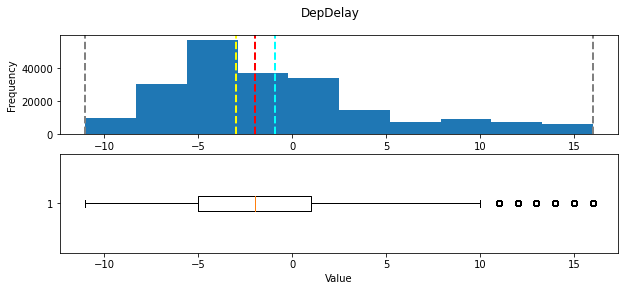

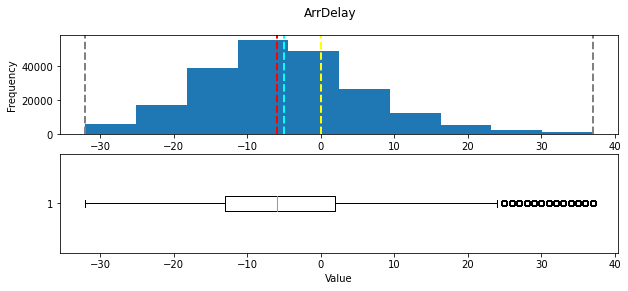

In [9]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

# View the revised distributions
for col in delayFields:
    show_distribution(df_flights[col])

DepDelay 
Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00

ArrDelay 
Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



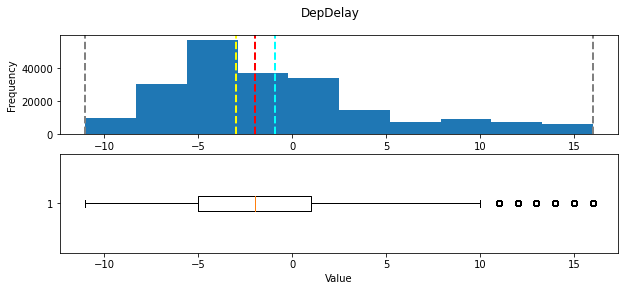

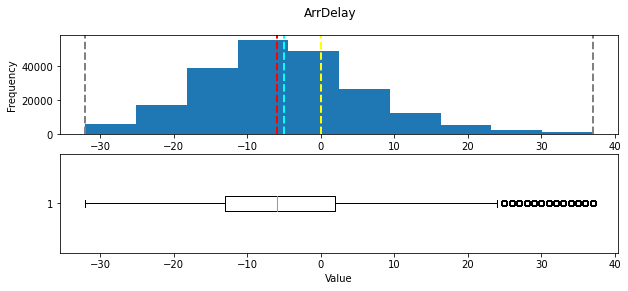

In [10]:
# Review outliers after filtering
delayFields = ["DepDelay","ArrDelay"]
for col in delayFields:
    show_distribution(df_flights[col])

## Explore cleaned data

### Summary statistics for numeric fields

In [11]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


### Average (mean) departure and arrival delays

In [12]:
print(f"The average departure delay is {df_flights['DepDelay'].mean()}")
print(f"The average arrival delay is {df_flights['ArrDelay'].mean()}")

The average departure delay is -0.9216920012873314
The average arrival delay is -5.030275610199769


### How do the carriers compare in terms of arrival delay performance?

In [13]:
# Get the average delay, grouped by carrier
carrier_avg_arr_delay = df_flights.groupby(df_flights["Carrier"])['ArrDelay'].mean()
# Reset DF index so the Carrier is a column, not the index
carrier_avg_arr_delay = carrier_avg_arr_delay.reset_index()
# Sort carriers by arrival delay
carrier_avg_arr_delay.sort_values(by="ArrDelay", inplace=True)

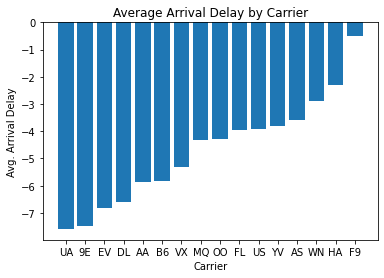

In [14]:
# Plot the average arrival delay, by carrier
plt.bar(
    x = carrier_avg_arr_delay["Carrier"], 
    height = carrier_avg_arr_delay['ArrDelay']
)

# Customize the chart
plt.title("Average Arrival Delay by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Avg. Arrival Delay")

# Display the plot
plt.show()

### Is there a noticable difference in arrival delays for different days of the week?

In [15]:
# Get the average delay, grouped by day of the week
weekdays_avg_arr_delay = df_flights.groupby(df_flights["DayOfWeek"])['ArrDelay'].mean()
# Reset DF index so the DayOfWeek is a column, not the index
weekdays_avg_arr_delay = weekdays_avg_arr_delay.reset_index()
# Sort carriers by arrival delay
weekdays_avg_arr_delay.sort_values(by="ArrDelay", inplace=True)

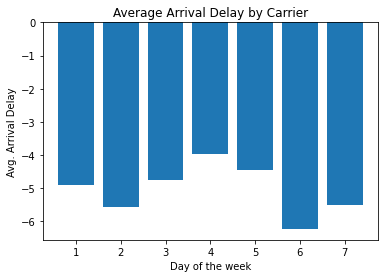

In [16]:
# Plot the average arrival delay, by carrier
plt.bar(
    x = weekdays_avg_arr_delay["DayOfWeek"], 
    height = weekdays_avg_arr_delay['ArrDelay']
)

# Customize the chart
plt.title("Average Arrival Delay by Carrier")
plt.xlabel("Day of the week")
plt.ylabel("Avg. Arrival Delay")

# Display the plot
plt.show()

### Which departure airport has the highest average departure delay?

In [17]:
# Get the average departure delay, grouped by airport id and name
airport_avg_dep_delay = df_flights.groupby(["OriginAirportID", "OriginAirportName"])["DepDelay"].mean()
airport_avg_dep_delay = airport_avg_dep_delay.reset_index()
# Sort by departure delay, in descending order
airport_avg_dep_delay.sort_values(by="DepDelay", ascending=False, inplace=True)

# The first airport is the answer
answer = airport_avg_dep_delay.iloc[0]
print(f"The airport with the highest departure delay is {answer['OriginAirportName']}, with an average {round(answer['DepDelay'], 2)} minutes of delay.")

The airport with the highest departure delay is Chicago Midway International, with an average 2.37 minutes of delay.


### Do late departures tend to result in longer arrival delays than on-time departures?

In [18]:
dep_delay_analysis = df_flights[["DepDelay", "ArrDelay"]]
dep_delay_analysis["IsDepDelayed"] = np.where(dep_delay_analysis["DepDelay"] > 0, 1, 0)

# Get the average delay, grouped by day of the week
dep_delay_analysis = dep_delay_analysis.groupby("IsDepDelayed")["ArrDelay"].mean()
# Reset DF index so the IsDepDelayed is a column, not the index
dep_delay_analysis = dep_delay_analysis.reset_index()

dep_delay_analysis

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,IsDepDelayed,ArrDelay
0,0,-7.58389
1,1,1.48167


### Which route (from origin airport to destination airport) has the most late arrivals?

In [50]:
# late arrivals are defined as arrivals that take more than 15 minutes
route_late_arrivals = df_flights[["OriginAirportName", "DestAirportName", "ArrDel15"]]
# Keep only travels with late arrivals
route_late_arrivals = route_late_arrivals[df_flights["ArrDel15"] == 1]
# Create a column with the route (origin and destination cities)
route_late_arrivals["Route"] = route_late_arrivals['OriginAirportName'] + " - " + route_late_arrivals['DestAirportName']

# Count the number of delayed arrivals for each route
route_late_arrivals = route_late_arrivals.groupby("Route")["ArrDel15"].count()
route_late_arrivals = route_late_arrivals.reset_index()
route_late_arrivals.sort_values(by="ArrDel15", ascending=False, inplace=True)

route_late_arrivals

,Route,ArrDel15
1883,San Francisco International - Los Angeles Inte...,90
1044,Los Angeles International - San Francisco Inte...,69
888,LaGuardia - Hartsfield-Jackson Atlanta Interna...,68
1019,Los Angeles International - John F. Kennedy In...,52
877,LaGuardia - Charlotte Douglas International,51
...,...,...
941,Lambert-St. Louis International - Seattle/Taco...,1
943,Lambert-St. Louis International - Will Rogers ...,1
950,Logan International - Cincinnati/Northern Kent...,1
1794,Salt Lake City International - Norman Y. Minet...,1


### Which route has the highest average arrival delay?

In [51]:
# late arrivals are defined as arrivals that take more than 15 minutes
route_late_arrivals = df_flights[["OriginAirportName", "DestAirportName", "ArrDelay", "ArrDel15"]]
# Keep only travels with late arrivals
# Create a column with the route (origin and destination cities)
route_late_arrivals["Route"] = route_late_arrivals['OriginAirportName'] + " - " + route_late_arrivals['DestAirportName']

# Count the number of delayed arrivals for each route
route_late_arrivals = route_late_arrivals.groupby("Route")["ArrDelay"].mean()
route_late_arrivals = route_late_arrivals.reset_index()
route_late_arrivals.sort_values(by="ArrDelay", ascending=False, inplace=True)

route_late_arrivals

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Route,ArrDelay
1237,Louis Armstrong New Orleans International - Ro...,24.500000
397,Cleveland-Hopkins International - Palm Beach I...,18.000000
910,John F. Kennedy International - Louisville Int...,18.000000
398,Cleveland-Hopkins International - Philadelphia...,12.800000
1349,Memphis International - Denver International,9.758621
...,...,...
1052,Lambert-St. Louis International - Cleveland-Ho...,-20.000000
608,Eppley Airfield - LaGuardia,-20.750000
507,Denver International - Kahului Airport,-22.666667
864,Jacksonville International - Chicago Midway In...,-24.125000
